# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [2]:
def bit_slice(pixel, plane):
    # plane = [1,2, ..., 8]
    
    if plane < 1 or plane > 8:
        raise Exception("Wrong bit slice level")
    
    return pixel & (2 ** (plane - 1))

In [3]:
def bit_slice_image(img, plane, brightened = False):
    stowa = cv2.imread(img)

    height, width, _ = stowa.shape

    for y in range(height):
        for x in range(width):
            pixel = stowa[y, x]
            blue = bit_slice(pixel[0], plane)
            green = bit_slice(pixel[1], plane)
            red = bit_slice(pixel[2], plane)
            
            if brightened: 
                blue = max(150, blue) if blue > 0 else 0
                green = max(150, green) if green > 0 else 0
                red = max(150, red) if red > 0 else 0
             
            
            stowa[y, x] = (blue, green, red)
                
    plt.imshow(stowa)
    plt.axis('off') 

Wykonuję najpierw zwykły slicing

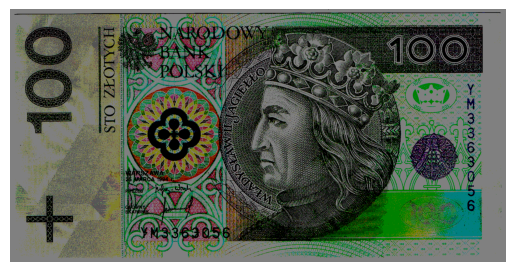

In [4]:
bit_slice_image('100zloty.jpg', 8)

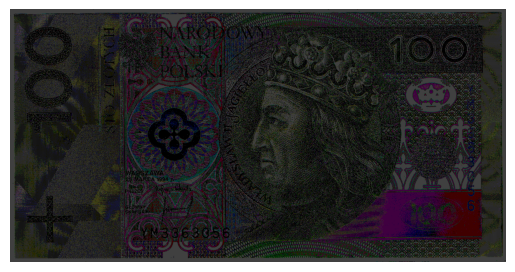

In [5]:
bit_slice_image('100zloty.jpg', 7)

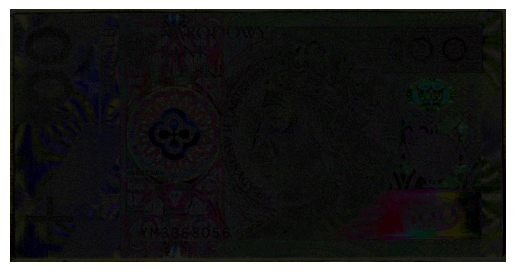

In [6]:
bit_slice_image('100zloty.jpg', 6)

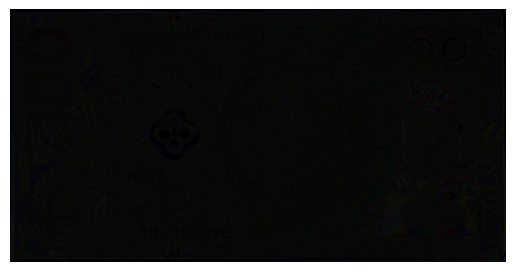

In [7]:
bit_slice_image('100zloty.jpg', 5)

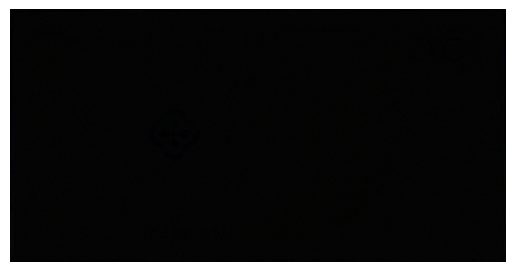

In [8]:
bit_slice_image('100zloty.jpg', 4)

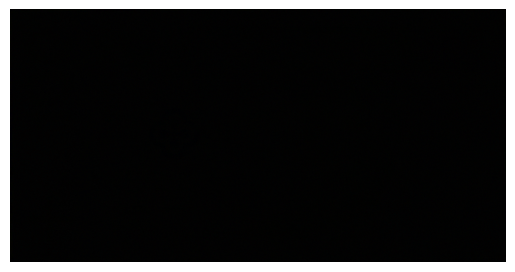

In [9]:
bit_slice_image('100zloty.jpg', 3)

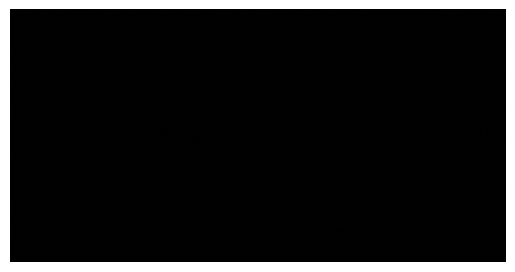

In [10]:
bit_slice_image('100zloty.jpg', 2)

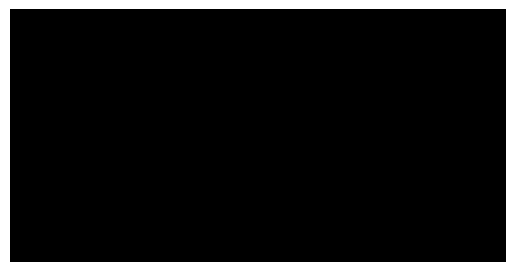

In [11]:
bit_slice_image('100zloty.jpg', 1)

Rozjaśnione ciemniejszych slice'ow

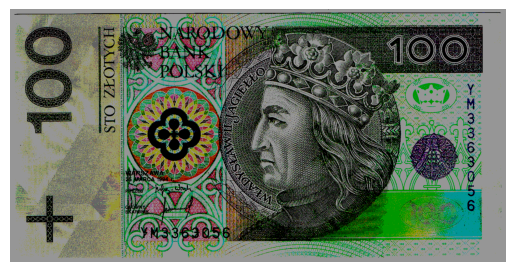

In [12]:
bit_slice_image('100zloty.jpg', 8, True)

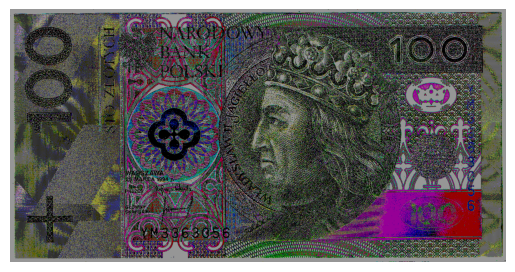

In [13]:
bit_slice_image('100zloty.jpg', 7, True)

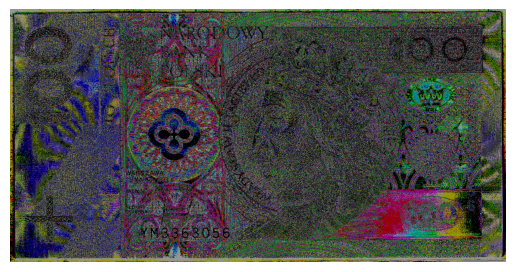

In [14]:
bit_slice_image('100zloty.jpg', 6, True)

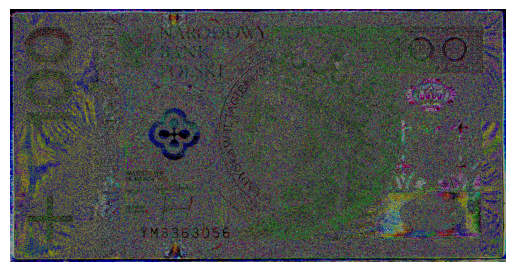

In [15]:
bit_slice_image('100zloty.jpg', 5, True)

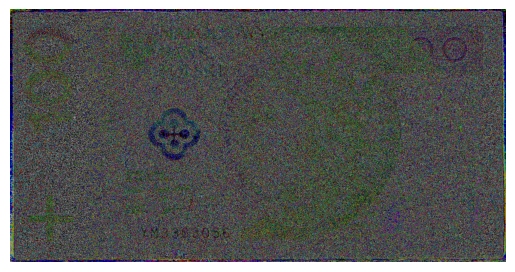

In [16]:
bit_slice_image('100zloty.jpg', 4, True)

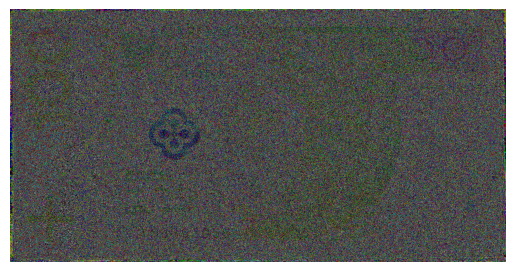

In [17]:
bit_slice_image('100zloty.jpg', 3, True)

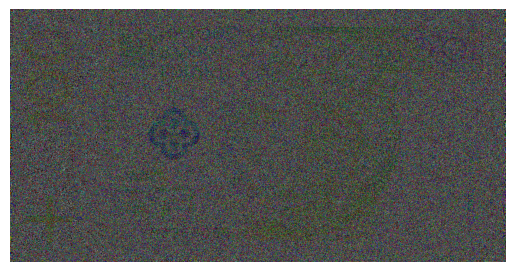

In [18]:
bit_slice_image('100zloty.jpg', 2, True)

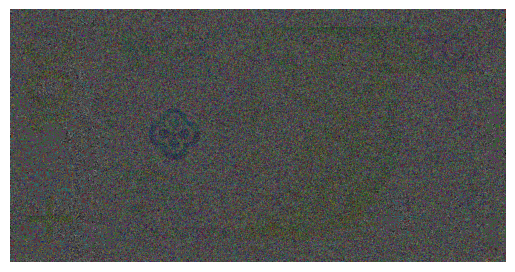

In [19]:
bit_slice_image('100zloty.jpg', 1, True)

Rekonstrukcja

In [20]:
def reconstruct_from_slice(img, planes):
    stowa = cv2.imread(img)

    height, width, _ = stowa.shape

    for y in range(height):
        for x in range(width):
            pixel = stowa[y, x]
            
            blue = 0
            green = 0
            red = 0
            
            for plane in planes:
            
                blue |= bit_slice(pixel[0], plane)
                green |= bit_slice(pixel[1], plane)
                red |= bit_slice(pixel[2], plane)
            
            stowa[y, x] = (blue, green, red)
                
    plt.imshow(stowa)
    plt.axis('off') 

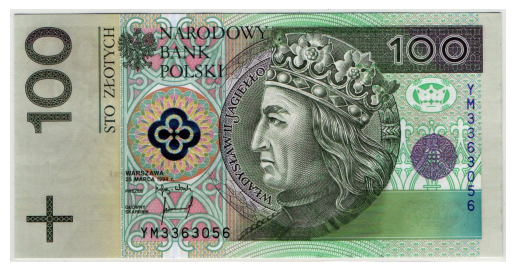

In [21]:
reconstruct_from_slice('100zloty.jpg', [8, 7, 6, 5, 4, 3, 2, 1])

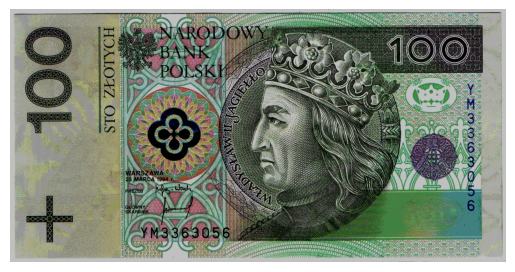

In [22]:
reconstruct_from_slice('100zloty.jpg', [8, 7])

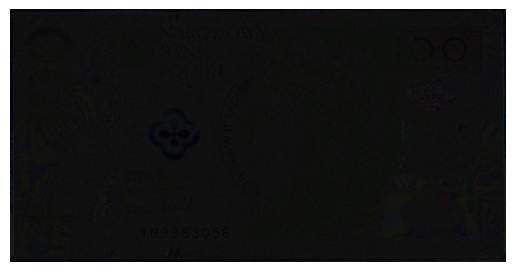

In [23]:
reconstruct_from_slice('100zloty.jpg', [5, 4, 3, 2, 1])

In [ ]:
reconstruct_from_slice('100zloty.jpg', [7, 5, 3, 1])